# Topic distribution

Using the bag of words (dictionary) and topic models generated from the corpus, I now use them to project publications in the LDA topic space, as well as for the individuals in the School

## Setup

In [1]:
import pandas as pd
import numpy as np
import cPickle as pkl

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
rng = np.random.RandomState(1234567)

In [3]:
from gensim import models
from gensim.corpora import Dictionary

In [4]:
from sklearn import manifold
from sklearn.cluster import DBSCAN

In [5]:
import seaborn as sns

In [6]:
## TRYING WITH HDBSCAN:  http://hdbscan.readthedocs.io/en/latest/basic_hdbscan.html
from hdbscan import HDBSCAN 

In [33]:
def inference(ldaModel, ldaVector):
    num_topics = ldaModel.num_topics
    topic_dist = ldaModel[ldaVector]
    
    # index the topic_distribution according to the distribution:
    out = np.zeros(num_topics)
    for (i,v) in topic_dist:
        out[i] = v
    assert len(out) == num_topics
    return out

def best_topic(topic_dist):
    """
    Assign the pulbication with the topic that best describes it;
    this is equivalent to the index that have the highest topic_distribution
    """
    a = np.argmax(topic_dist)
    assert a < 20
    assert a >= 0
    return a

In [36]:
lookup_pub = pkl.load(open('../infnet-analysis/data/lookup_pub.pkl', 'rb'))
lookup_poinf = pkl.load(open('../infnet-analysis/data/lookup_poinf.pkl','rb'))
pub_toks = pkl.load(open('../infnet-scrapper/data/pub_toks.pkl','rb'))

# Full Model

In [25]:
# Load Dictionary to convert words to id:
dictionary_fullpub = pkl.load(open('./dictionary_fullpub.pkl','rb'))
pub_toks_fullpub = pkl.load(open('./pub_toks_wBOW_fullpub.pkl', 'rb'))

In [9]:
# load the LDA models:
fullpubLDA = models.LdaModel.load('fullpub.ldamodel')

## Topic Distribution by Publications

In [37]:
# Convert tokens to bow:
bowified = lambda row: dictionary_fullpub.doc2bow(row.summary_toks)
pub_toks['bow'] = pub_toks.apply(bowified, axis=1)

In [39]:
pub_toks_fullpub.head(4)

year  \
pub_id                                       
400818dc-63af-4a26-80c5-906f98e1f8ab  1989   
18b1a861-afef-4fff-bc80-d02e05be18c4  2013   
309fdbfc-227b-4588-9264-f0f4e3cadfcb  1994   
d5814bab-5fc2-4c31-92b7-543c7ce75cb4  2012   

                                                                           summary_toks  \
pub_id                                                                                    
400818dc-63af-4a26-80c5-906f98e1f8ab  [balloon, stabil, analysi, jet, hmode, dischar...   
18b1a861-afef-4fff-bc80-d02e05be18c4  [queri, process, data, integr, chapter, illust...   
309fdbfc-227b-4588-9264-f0f4e3cadfcb  [comprehens, syntax, syntax, comprehens, close...   
d5814bab-5fc2-4c31-92b7-543c7ce75cb4  [evalu, speaker, verif, secur, detect, hmmbase...   

                                                                                    bow  
pub_id                                                                                   
400818dc-63af-4a26-80c5-906f98e1f8ab  [(40, 2), (156, 1), (223, 2), (293, 2), (328, ...  
18b1a861-afef-4fff-bc80-d02e05be18c4  [(40, 1), (229, 1), (253, 1), (319, 2), (330, ...  
309fdbfc-227b-4588-9264-f0f4e3cadfcb  [(90, 3), (123, 1), (186, 1), (189, 5), (196, ...  
d5814bab-5fc2-4c31-92b7-543c7ce75cb4  [(18, 1), (28, 1), (29, 2), (30, 1), (63, 1), ...

In [38]:
_inference = lambda row: inference(fullpubLDA, row.bow)
pub_toks['topic_distribution'] = pub_toks.apply(_inference, axis=1)

ValueError: Shape of passed values is (8810, 20), indices imply (8810, 3)

In [ ]:
pub_toks_fullpub.head(4)

In [13]:
pub_toks_fullpub['best_topic'] = pub_toks_fullpub.apply(
    lambda row: best_topic(row.topic_distribution), axis=1)

In [14]:
pub_toks_fullpub.head(4)

year  \
pub_id                                       
400818dc-63af-4a26-80c5-906f98e1f8ab  1989   
18b1a861-afef-4fff-bc80-d02e05be18c4  2013   
309fdbfc-227b-4588-9264-f0f4e3cadfcb  1994   
d5814bab-5fc2-4c31-92b7-543c7ce75cb4  2012   

                                                                           summary_toks  \
pub_id                                                                                    
400818dc-63af-4a26-80c5-906f98e1f8ab  [balloon, stabil, analysi, jet, hmode, dischar...   
18b1a861-afef-4fff-bc80-d02e05be18c4  [queri, process, data, integr, chapter, illust...   
309fdbfc-227b-4588-9264-f0f4e3cadfcb  [comprehens, syntax, syntax, comprehens, close...   
d5814bab-5fc2-4c31-92b7-543c7ce75cb4  [evalu, speaker, verif, secur, detect, hmmbase...   

                                                                                    bow  \
pub_id                                                                                    
400818dc-63af-4a26-80c5-906f98e1f8ab  [(40, 2), (156, 1), (223, 2), (293, 2), (328, ...   
18b1a861-afef-4fff-bc80-d02e05be18c4  [(40, 1), (229, 1), (253, 1), (319, 2), (330, ...   
309fdbfc-227b-4588-9264-f0f4e3cadfcb  [(90, 3), (123, 1), (186, 1), (189, 5), (196, ...   
d5814bab-5fc2-4c31-92b7-543c7ce75cb4  [(18, 1), (28, 1), (29, 2), (30, 1), (63, 1), ...   

                                                                     topic_distribution  \
pub_id                                                                                    
400818dc-63af-4a26-80c5-906f98e1f8ab  [0.0432158768572, 0.0715250581367, 0, 0, 0, 0,...   
18b1a861-afef-4fff-bc80-d02e05be18c4  [0, 0, 0, 0, 0.355813320309, 0.491517684931, 0...   
309fdbfc-227b-4588-9264-f0f4e3cadfcb  [0, 0, 0, 0, 0, 0.447156743532, 0, 0, 0, 0.086...   
d5814bab-5fc2-4c31-92b7-543c7ce75cb4  [0, 0.0915793927974, 0, 0, 0, 0, 0, 0, 0.71571...   

                                      best_topic  
pub_id                                            
400818dc-63af-4a26-80c5-906f98e1f8ab          17  
18b1a861-afef-4fff-bc80-d02e05be18c4           5  
309fdbfc-227b-4588-9264-f0f4e3cadfcb           5  
d5814bab-5fc2-4c31-92b7-543c7ce75cb4           8

In [22]:
for i in pub_toks_fullpub.topic_distribution.values

array([ list([0.043215876857212288, 0.071525058136711755, 0, 0, 0, 0, 0.12037318970268326, 0, 0, 0, 0.11284590994210027, 0, 0.095179133693972823, 0, 0.070988153066564461, 0, 0, 0.38160904424308584, 0, 0.095692205609988951]),
       list([0, 0, 0, 0, 0.35581332030904217, 0.49151768493091391, 0, 0.037201868171965802, 0, 0, 0, 0, 0, 0, 0, 0, 0.032633164380000447, 0, 0.071470325673662058, 0]),
       list([0, 0, 0, 0, 0, 0.44715674353152818, 0, 0, 0, 0.086863090195190257, 0, 0, 0, 0.041233604059755277, 0, 0, 0.40874656197968368, 0, 0, 0]),
       ...,
       list([0, 0, 0.093209641405310448, 0, 0.047960060564614063, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.47777924993998011, 0, 0, 0.35028181683990756, 0]),
       list([0.12401570926604334, 0, 0, 0, 0.47426115262940255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.15516971569253885, 0, 0.21322008855572466, 0, 0, 0]),
       list([0, 0.65555636698404451, 0, 0, 0.08536071510277865, 0.13385696854387311, 0, 0, 0, 0, 0, 0, 0, 0.075225949182559676, 0, 0, 0, 0, 0, 0])], d

## Clustering

In [15]:
## Our dataset will be the topic_distribution:
data = pub_toks_fullpub.topic_distribution.values

### Visualisation

We can visualise the data in 2D, and color each publication based on the most salient topic it is on:

#### `TSNE`

Here, use the `manifold` package from sklearn to reduce the dimensionality of the data for visualisation.
For coloring, use the topic that gives the highest probability

In [16]:
x_components = manifold.TSNE(n_components=2, init='pca', random_state=rng).fit_transform(data)

ValueError: setting an array element with a sequence.

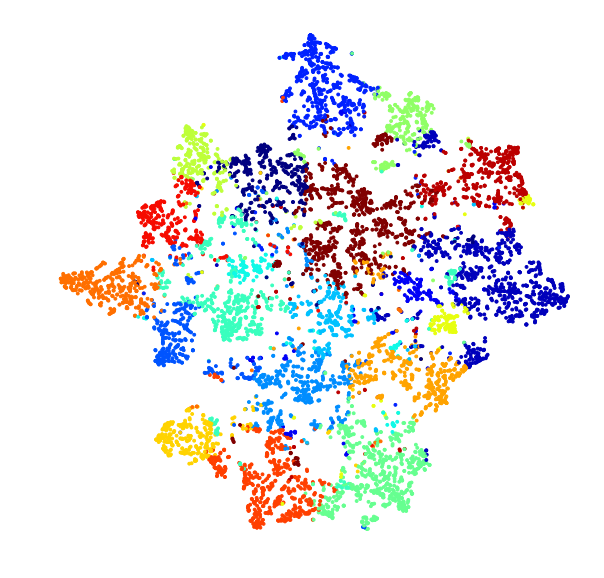

In [103]:
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111)
ax.scatter(x_components[:,0], x_components[:,1], c=list(pub_toks.best_topic), cmap=plt.cm.jet, s=8)
ax.legend(loc='best')
ax.axis('off')
plt.show()

#### `MDS`

In [218]:
# Multidimensional Scaling
mds_components = manifold.MDS(n_components=2, random_state=rng).fit_transform(data)

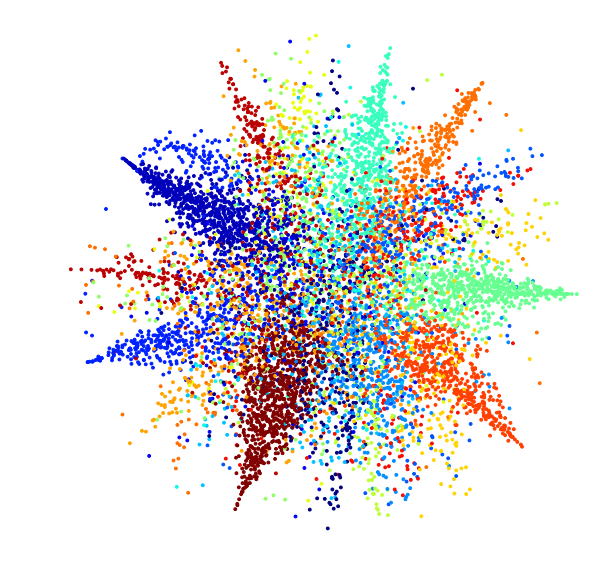

In [219]:
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111)
ax.scatter(mds_components[:,0], mds_components[:,1], c=list(pub_toks.best_topic), cmap=plt.cm.jet, s=8)
ax.legend(loc='best')
ax.axis('off')
plt.show()

While the colors of the publications are based on the topic the publication is salient on (from the LDA), we make no assumption that these are the clusters that are being used. 

Hence, now we use some clustering algorithm to cluster our data such that we can color them accordingly. In our clustering algorithms, we have 20 clusters as well, similar to the topics.

### KMeans

In [25]:
from sklearn.cluster import KMeans

####  `n_cluster = 20`

In [26]:
kmeansClustering = KMeans(n_clusters=20).fit_predict(data)

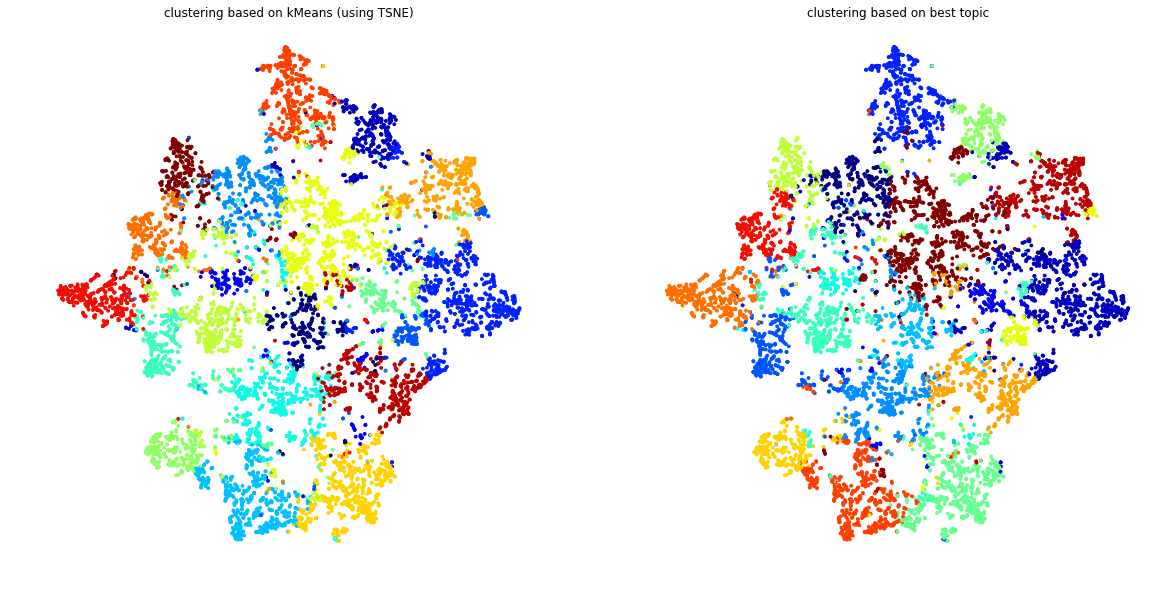

In [28]:
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(121)
ax.scatter(x_components[:,0], x_components[:,1], c=kmeansClustering, cmap=plt.cm.jet, s=8)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('clustering based on kMeans (using TSNE)')
ax2 = f.add_subplot(122)
ax2.scatter(x_components[:,0], x_components[:,1], c=list(pub_toks.best_topic), cmap=plt.cm.jet, s=8)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('clustering based on best topic')
plt.show()

In [ ]:
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(121)
ax.scatter(mds_components[:,0], mds_components[:,1], c=kmeansClustering, cmap=plt.cm.jet, s=20)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('Clustering baed on kMeans (mds)')

ax2 = f.add_subplot(122)
ax2.scatter(mds_components[:,0], mds_components[:,1], c=list(pub_toks.best_topic), cmap=plt.cm.jet, s=20)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('Clustering based on best_topic (mds)')
plt.show()
plt.show()

#### `n_cluster = 30`

In [29]:
kmeansClustering30 = KMeans(n_clusters=30).fit_predict(data)

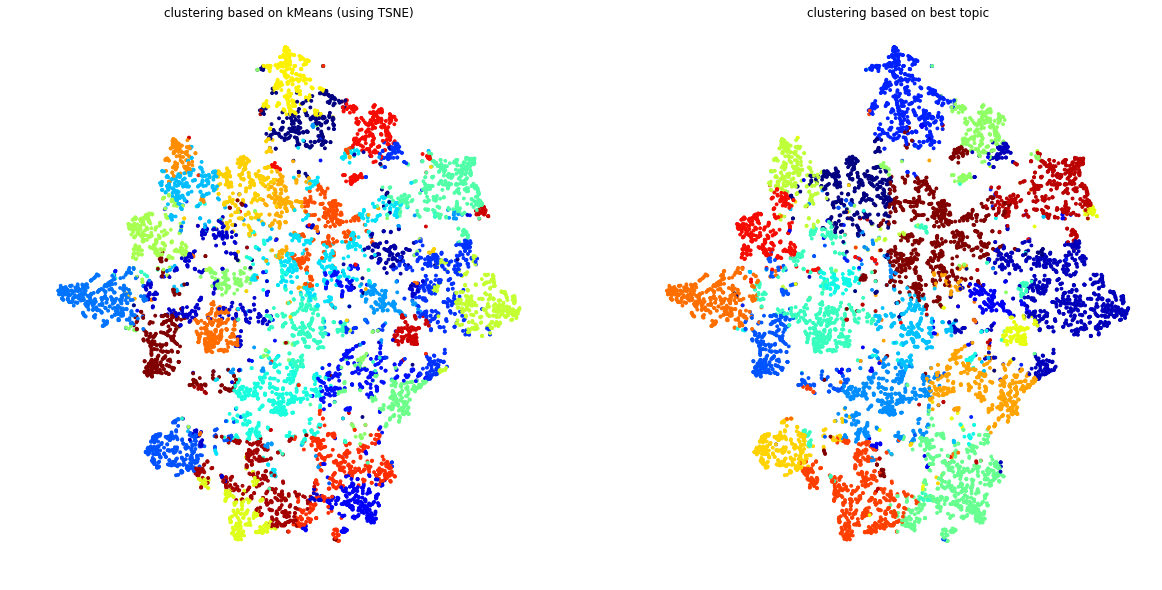

In [30]:
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(121)
ax.scatter(x_components[:,0], x_components[:,1], c=kmeansClustering30, cmap=plt.cm.jet, s=8)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('clustering based on kMeans (using TSNE)')
ax2 = f.add_subplot(122)
ax2.scatter(x_components[:,0], x_components[:,1], c=list(pub_toks.best_topic), cmap=plt.cm.jet, s=8)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('clustering based on best topic')
plt.show()

#### `n_cluster = 10`

In [33]:
kmeansClustering10 = KMeans(n_clusters=10).fit_predict(data)

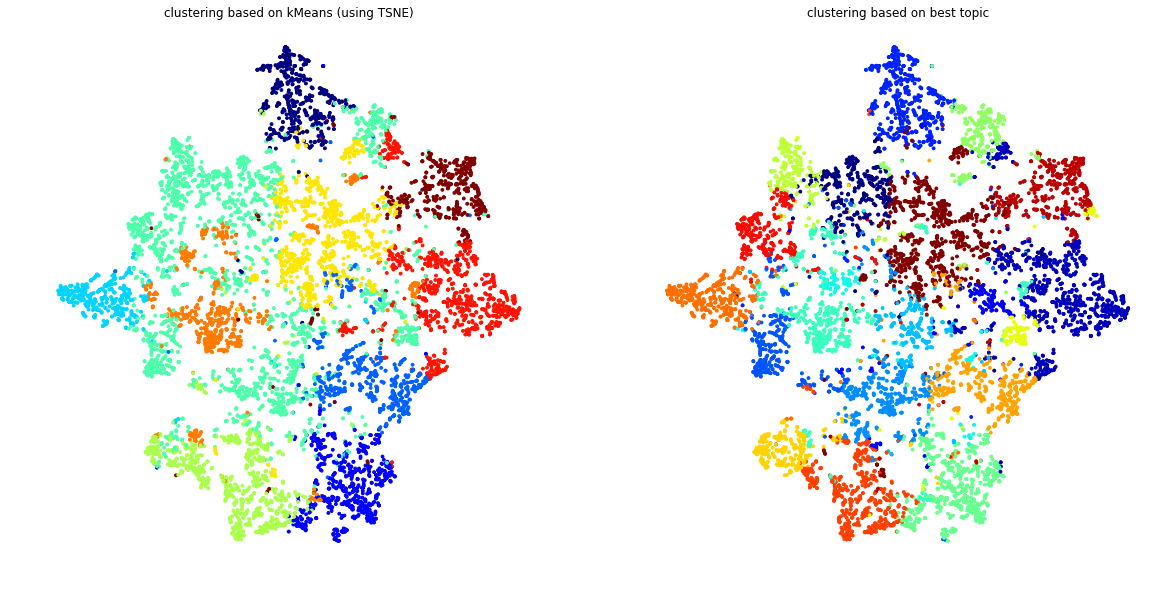

In [34]:
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(121)
ax.scatter(x_components[:,0], x_components[:,1], c=kmeansClustering10, cmap=plt.cm.jet, s=8)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('clustering based on kMeans (using TSNE)')
ax2 = f.add_subplot(122)
ax2.scatter(x_components[:,0], x_components[:,1], c=list(pub_toks.best_topic), cmap=plt.cm.jet, s=8)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('clustering based on best topic')
plt.show()

### DBScan

In [62]:
dbscan_pub = DBSCAN().fit(data)

In [64]:
dbscan_clusters = dbscan_pub.labels_
n_clusters_ = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
print 'number of clusters:', n_clusters_

number of clusters: 1


In [65]:
dbscan_pub = DBSCAN().fit(x_components)

In [66]:
dbscan_clusters = dbscan_pub.labels_
n_clusters_ = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
print 'number of clusters:', n_clusters_

number of clusters: 203


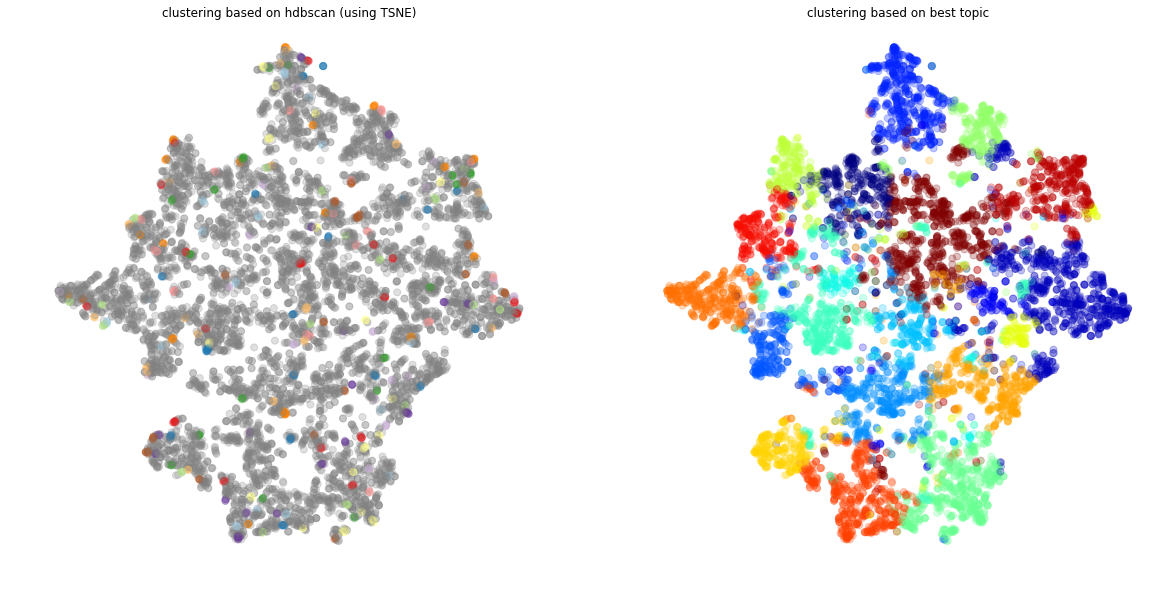

In [170]:
f = plt.figure(figsize=(20, 10))
ax = f.add_subplot(121)
color_palette = sns.color_palette('Paired', 203)
cluster_colors = [
    color_palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in dbscan_clusters
]
ax.scatter(
    x_components[:, 0], x_components[:, 1], c=cluster_colors, s=50, alpha=.25)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('clustering based on hdbscan (using TSNE)')
ax2 = f.add_subplot(122)
ax2.scatter(
    x_components[:, 0],
    x_components[:, 1],
    c=list(pub_toks.best_topic),
    cmap=plt.cm.jet,
    s=50,
    alpha=.25)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('clustering based on best topic')
plt.show()

In [220]:
dbscan_pub_mds = DBSCAN().fit(mds_components)

In [221]:
dbscan_pub_mds_clusters = dbscan_pub_mds.labels_
n_clusters_ = len(set(dbscan_pub_mds_clusters)) - (1 if -1 in dbscan_pub_mds_clusters else 0)
print 'number of clusters:', n_clusters_

number of clusters: 1


### HDBSCAN

In [83]:
from hdbscan import HDBSCAN
import hdbscan

In [41]:
hdbscan_cluster = HDBSCAN().fit(data)

In [44]:
n_clusters_ = len(set(hdbscan_cluster.labels_)) - (1 if -1 in hdbscan_cluster.labels_ else 0)
print 'number of clusters:', n_clusters_

number of clusters: 102


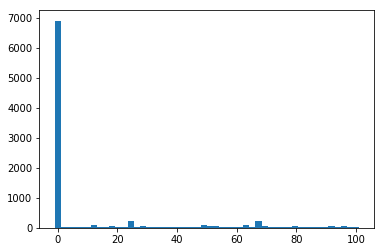

In [60]:
f = plt.figure()
ax = f.add_subplot(111)
ax.hist(hdbscan_cluster.labels_,bins=50);
plt.show()

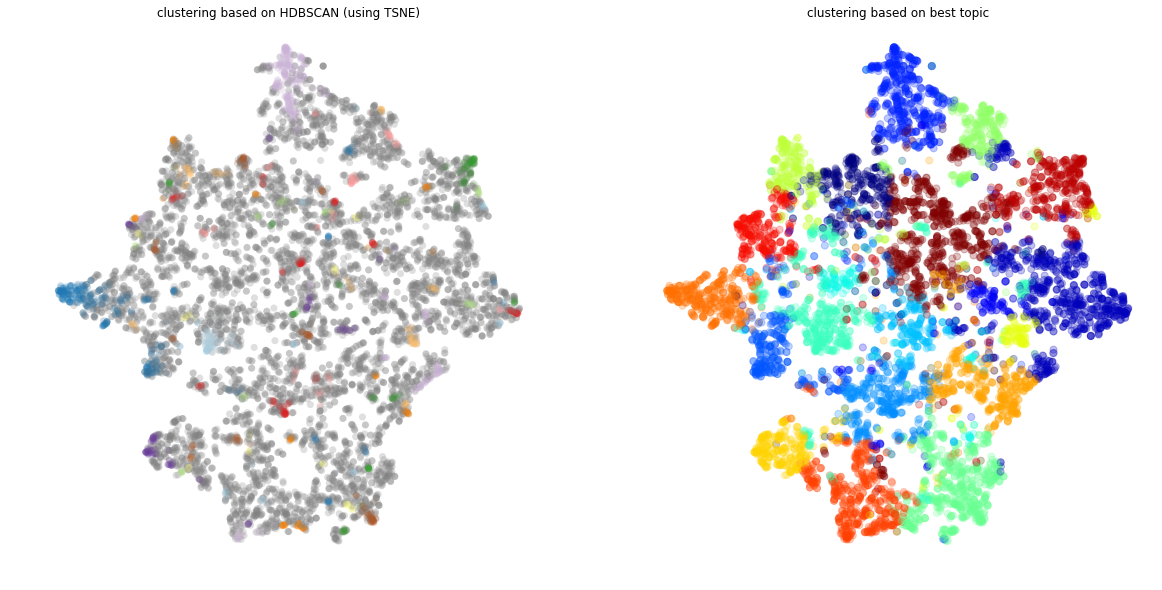

In [169]:
f = plt.figure(figsize=(20, 10))
ax = f.add_subplot(121)
color_palette = sns.color_palette('Paired', 102)
cluster_colors = [
    color_palette[x] if x >= 0 else (0.5, 0.5, 0.5)
    for x in hdbscan_cluster.labels_
]
#  colors weighted according to te probability of being in the cluster
cluster_member_colors = [
    sns.desaturate(x, p)
    for x, p in zip(cluster_colors, hdbscan_cluster.probabilities_)
]
ax.scatter(
    *x_components.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

# ax.scatter(x_components[:,0], x_components[:,1], c=hdbscan_cluster.labels_, cmap=plt.cm.jet, s=8)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('clustering based on HDBSCAN (using TSNE)')
ax2 = f.add_subplot(122)
ax2.scatter(
    x_components[:, 0],
    x_components[:, 1],
    c=list(pub_toks.best_topic),
    cmap=plt.cm.jet,
    s=50,
    alpha=.25)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('clustering based on best topic')
plt.show()

### Soft clustering in HDBSCAN*

In [78]:
clusterer = HDBSCAN(prediction_data=True).fit(data)

In [79]:
n_clusters_ = len(set(hdbscan_cluster.labels_)) - (1 if -1 in hdbscan_cluster.labels_ else 0)
print 'number of clusters:', n_clusters_

number of clusters: 102


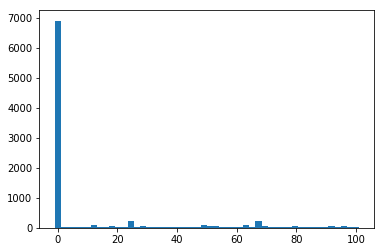

In [81]:
f = plt.figure()
ax = f.add_subplot(111)
ax.hist(clusterer.labels_,bins=50);
plt.show()

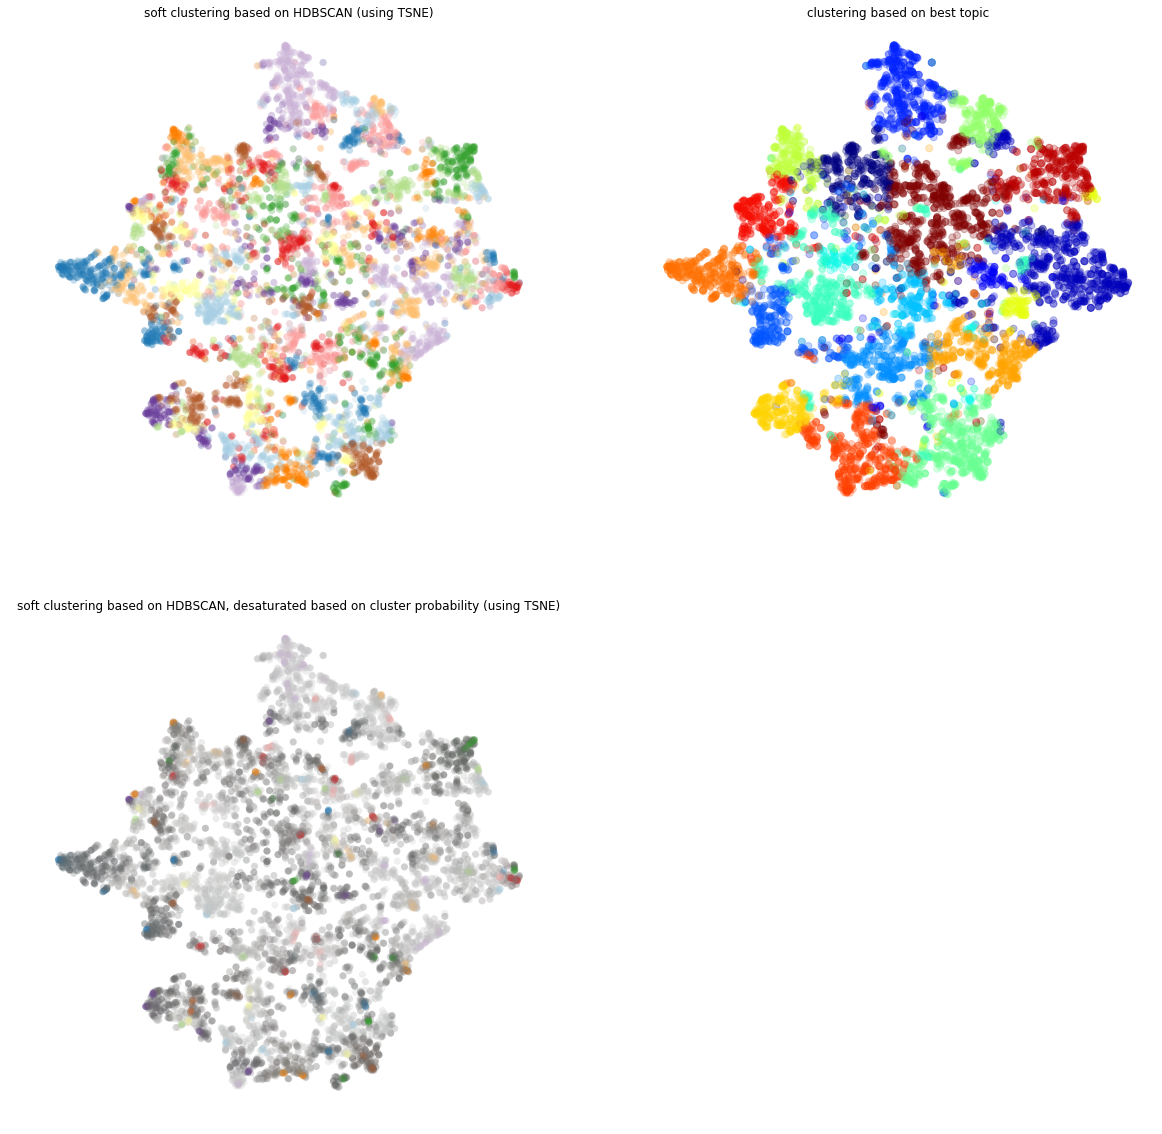

In [168]:
f = plt.figure(figsize=(20, 20))
ax = f.add_subplot(221)

soft_clusters = hdbscan.all_points_membership_vectors(clusterer)
color_palette = sns.color_palette('Paired', 102)
cluster_colors = [color_palette[np.argmax(x)] for x in soft_clusters]
ax.scatter(*x_components.T, s=50, linewidth=0, c=cluster_colors, alpha=0.25)

# ax.scatter(x_components[:,0], x_components[:,1], c=hdbscan_cluster.labels_, cmap=plt.cm.jet, s=8)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('soft clustering based on HDBSCAN (using TSNE)')
ax2 = f.add_subplot(222)
ax2.scatter(
    x_components[:, 0],
    x_components[:, 1],
    c=list(pub_toks.best_topic),
    cmap=plt.cm.jet,
    s=50,
    alpha=.25)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('clustering based on best topic')

ax3 = f.add_subplot(223)
cluster_colors = [
    sns.desaturate(color_palette[np.argmax(x)], np.max(x))
    for x in soft_clusters
]
ax3.scatter(*x_components.T, s=50, linewidth=0, c=cluster_colors, alpha=0.25)
ax3.axis('off')
ax3.set_title(
    'soft clustering based on HDBSCAN, desaturated based on cluster probability (using TSNE)'
)
plt.show()

# Topic Distribution of PoInf

In [92]:
# Create a new pandas table that merge the lookup_poinf and lookup_pub
# each pub in lookup_pub have a collab_id that have a list of collaborators by id
# We can ignore those that are not in the list of id for PoInf

# Create the list of ids for easy checking:
poinf_id = set(lookup_poinf.index)

# we can now create such an index:
pub_mapping = {str(_id):set() for _id in list(poinf_id)}

for row in lookup_pub.iterrows():
    pub_id = row[0]
    collab_ids = row[1]['collab_id']
    for _id in collab_ids:
        if _id in poinf_id:
            pub_mapping[_id].add(pub_id)

In [93]:
row_list = [{'id':k, 'pub_ids':v} for (k,v) in pub_mapping.items()]

In [94]:
# Add these pub_ids to the pandas df:
df_pubmapping = pd.DataFrame(row_list)

In [95]:
lookup_poinf_more = lookup_poinf.join(df_pubmapping.set_index('id'))

In [37]:
lookup_poinf_more.iloc[20:24]

last_name first_name  \
id                                                            
0ed800f5-a3a0-47d7-a8b3-f97a4f2b6931     steuwer     michel   
102286ee-5f21-4aed-abfd-e4ea1a615223  oberlander        jon   
10ff8e7a-53b2-4d2f-adad-ef695bc595a7         wen     zhenyu   
114a78ef-c940-4653-8429-7c2897a96043   jovanovic     jelena   

                                                                          perseonal_url  \
id                                                                                        
0ed800f5-a3a0-47d7-a8b3-f97a4f2b6931  http://www.research.ed.ac.uk/portal/en/persons...   
102286ee-5f21-4aed-abfd-e4ea1a615223  http://www.research.ed.ac.uk/portal/en/persons...   
10ff8e7a-53b2-4d2f-adad-ef695bc595a7  http://www.research.ed.ac.uk/portal/en/persons...   
114a78ef-c940-4653-8429-7c2897a96043  http://www.research.ed.ac.uk/portal/en/persons...   

                                                      position  \
id                                                               
0ed800f5-a3a0-47d7-a8b3-f97a4f2b6931                   unknown   
102286ee-5f21-4aed-abfd-e4ea1a615223                 professor   
10ff8e7a-53b2-4d2f-adad-ef695bc595a7        research associate   
114a78ef-c940-4653-8429-7c2897a96043  visitor official visitor   

                                                                            parent  \
id                                                                                   
0ed800f5-a3a0-47d7-a8b3-f97a4f2b6931  institute for computing systems architecture   
102286ee-5f21-4aed-abfd-e4ea1a615223                         school of informatics   
10ff8e7a-53b2-4d2f-adad-ef695bc595a7                         school of informatics   
114a78ef-c940-4653-8429-7c2897a96043                         school of informatics   

                                                                            institute  \
id                                                                                      
0ed800f5-a3a0-47d7-a8b3-f97a4f2b6931   laboratory for foundations of computer science   
102286ee-5f21-4aed-abfd-e4ea1a615223  institute of language cognition and computation   
10ff8e7a-53b2-4d2f-adad-ef695bc595a7   laboratory for foundations of computer science   
114a78ef-c940-4653-8429-7c2897a96043  institute of language cognition and computation   

                                             full_name  institute_class  \
id                                                                        
0ed800f5-a3a0-47d7-a8b3-f97a4f2b6931    steuwer michel                3   
102286ee-5f21-4aed-abfd-e4ea1a615223    oberlander jon                2   
10ff8e7a-53b2-4d2f-adad-ef695bc595a7        wen zhenyu                3   
114a78ef-c940-4653-8429-7c2897a96043  jovanovic jelena                2   

                                               alias  \
id                                                     
0ed800f5-a3a0-47d7-a8b3-f97a4f2b6931     steuwer, m.   
102286ee-5f21-4aed-abfd-e4ea1a615223  oberlander, j.   
10ff8e7a-53b2-4d2f-adad-ef695bc595a7         wen, z.   
114a78ef-c940-4653-8429-7c2897a96043   jovanovic, j.   

                                                                                pub_ids  \
id                                                                                        
0ed800f5-a3a0-47d7-a8b3-f97a4f2b6931  {20cb2fdd-6d93-40b9-9cab-e9d818eb166e, b74a3be...   
102286ee-5f21-4aed-abfd-e4ea1a615223  {5be3a6b1-5ee4-4a39-9fff-88b22238fb98, 4629e88...   
10ff8e7a-53b2-4d2f-adad-ef695bc595a7  {872e450f-87e9-4956-9678-5b09f3cd4f84, a4cad99...   
114a78ef-c940-4653-8429-7c2897a96043             {b4b0b45d-72d9-4f39-929c-ea451288f253}   

                                                                                   toks  
id                                                                                       
0ed800f5-a3a0-47d7-a8b3-f97a4f2b6931  [[highlevel, program, medic, imag, multigpu, s...  
102286ee-5f21-4aed-abfd-e4ea1a615223  [[verbal, effect, vis

In [96]:
def getToks(pub_ids):
    out = []
    try:
        if len(pub_ids):
            for pub_id in pub_ids:
                out.extend(pub_toks[pub_toks.index == pub_id].summary_toks)
            # Convert the list of lists to a single list:
            out = [tok for tokList in out for tok in tokList]
    except TypeError:
        print(pub_ids)
        
    return out

In [97]:
lookup_poinf_more['summary_toks'] = lookup_poinf_more.apply(lambda row: getToks(row.pub_ids), axis=1)

nan
nan
nan
nan


In [98]:
# Conert to BOW using bowified:
lookup_poinf_more['bow'] = lookup_poinf_more.apply(bowified, axis=1)

In [99]:
lookup_poinf_more['topic_distribution'] = lookup_poinf_more.apply(_inference, axis=1)

In [51]:
lookup_poinf_more.head(2)

last_name first_name  \
id                                                          
003ec9bb-18aa-4e6e-95e9-359f0968262a      gray      gavin   
010f9bf0-c04c-4cfb-ab3d-ca150de1e706   jackson       paul   

                                                                          perseonal_url  \
id                                                                                        
003ec9bb-18aa-4e6e-95e9-359f0968262a  http://www.research.ed.ac.uk/portal/en/persons...   
010f9bf0-c04c-4cfb-ab3d-ca150de1e706  http://www.research.ed.ac.uk/portal/en/persons...   

                                                position  \
id                                                         
003ec9bb-18aa-4e6e-95e9-359f0968262a  research assistant   
010f9bf0-c04c-4cfb-ab3d-ca150de1e706     senior lecturer   

                                                     parent  \
id                                                            
003ec9bb-18aa-4e6e-95e9-359f0968262a  school of informatics   
010f9bf0-c04c-4cfb-ab3d-ca150de1e706  school of informatics   

                                                                         institute  \
id                                                                                   
003ec9bb-18aa-4e6e-95e9-359f0968262a  institute for computing systems architecture   
010f9bf0-c04c-4cfb-ab3d-ca150de1e706  institute for computing systems architecture   

                                         full_name  institute_class  \
id                                                                    
003ec9bb-18aa-4e6e-95e9-359f0968262a    gray gavin                5   
010f9bf0-c04c-4cfb-ab3d-ca150de1e706  jackson paul                5   

                                                           alias  \
id                                                                 
003ec9bb-18aa-4e6e-95e9-359f0968262a                         NaN   
010f9bf0-c04c-4cfb-ab3d-ca150de1e706  jackson, p. b.|jackson, p.   

                                                                                pub_ids  \
id                                                                                        
003ec9bb-18aa-4e6e-95e9-359f0968262a                                                 {}   
010f9bf0-c04c-4cfb-ab3d-ca150de1e706  {c5754b06-fcf9-4362-aa3a-1142589b5402, 167c4b6...   

                                                                                   toks  \
id                                                                                        
003ec9bb-18aa-4e6e-95e9-359f0968262a                                                 []   
010f9bf0-c04c-4cfb-ab3d-ca150de1e706  [nuprl, use, circuit, design, nuprl, interact,...   

                                                                           summary_toks  \
id                                                                                        
003ec9bb-18aa-4e6e-95e9-359f0968262a                                                 []   
010f9bf0-c04c-4cfb-ab3d-ca150de1e706  [nuprl, use, circuit, design, nuprl, interact,...   

                                                                                    bow  \
id                                                                                        
003ec9bb-18aa-4e6e-95e9-359f0968262a                                                 []   
010f9bf0-c04c-4cfb-ab3d-ca150de1e706  [(22, 2), (27, 1), (29, 15), (39, 1), (40, 1),...   

                                                                     topic_distribution  
id                                                                                       
003ec9bb-18aa-4e6e-95e9-359f0968262a  [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0...  
010f9bf0-c04c-4cfb-ab3d-ca150de1e706  [0, 0.326083956289, 0.120584281776, 0.05047796...

In [134]:
len(lookup_poinf_more)

296

In [101]:
lookup_poinf_more['remove_drop'] = lookup_poinf_more.apply(lambda row: len(row.bow) == 0, axis=1)

In [102]:
# Remove individuals that does not have any bow:
lookup_poinf_more_drop = lookup_poinf_more.drop(lookup_poinf_more[lookup_poinf_more.remove_drop==True].index)

In [103]:
len(lookup_poinf_more_drop)

219

In [135]:
lookup_poinf_more_drop['best_topic'] = lookup_poinf_more_drop.apply(lambda row: best_topic(row.topic_distribution), axis=1)

/Users/weiting/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [154]:
lookup_poinf_more_drop.head(2)

last_name first_name  \
id                                                          
010f9bf0-c04c-4cfb-ab3d-ca150de1e706   jackson       paul   
02c86de2-0fc9-4f6d-aee9-93b0f7557c84    franke     bjoern   

                                                                          perseonal_url  \
id                                                                                        
010f9bf0-c04c-4cfb-ab3d-ca150de1e706  http://www.research.ed.ac.uk/portal/en/persons...   
02c86de2-0fc9-4f6d-aee9-93b0f7557c84  http://www.research.ed.ac.uk/portal/en/persons...   

                                             position                 parent  \
id                                                                             
010f9bf0-c04c-4cfb-ab3d-ca150de1e706  senior lecturer  school of informatics   
02c86de2-0fc9-4f6d-aee9-93b0f7557c84           reader  school of informatics   

                                                                            institute  \
id                                                                                      
010f9bf0-c04c-4cfb-ab3d-ca150de1e706     institute for computing systems architecture   
02c86de2-0fc9-4f6d-aee9-93b0f7557c84  institute of language cognition and computation   

                                          full_name  institute_class  \
id                                                                     
010f9bf0-c04c-4cfb-ab3d-ca150de1e706   jackson paul                5   
02c86de2-0fc9-4f6d-aee9-93b0f7557c84  franke bjoern                2   

                                                           alias  \
id                                                                 
010f9bf0-c04c-4cfb-ab3d-ca150de1e706  jackson, p. b.|jackson, p.   
02c86de2-0fc9-4f6d-aee9-93b0f7557c84                  franke, b.   

                                                                                pub_ids  \
id                                                                                        
010f9bf0-c04c-4cfb-ab3d-ca150de1e706  {c5754b06-fcf9-4362-aa3a-1142589b5402, 167c4b6...   
02c86de2-0fc9-4f6d-aee9-93b0f7557c84  {9a3368cc-e69d-4ecf-bad1-b43ab0ac89a8, ab3fccd...   

                                                                                   toks  \
id                                                                                        
010f9bf0-c04c-4cfb-ab3d-ca150de1e706  [nuprl, use, circuit, design, nuprl, interact,...   
02c86de2-0fc9-4f6d-aee9-93b0f7557c84  [use, genet, program, sourcelevel, data, assig...   

                                                                           summary_toks  \
id                                                                                        
010f9bf0-c04c-4cfb-ab3d-ca150de1e706  [nuprl, use, circuit, design, nuprl, interact,...   
02c86de2-0fc9-4f6d-aee9-93b0f7557c84  [use, genet, program, sourcelevel, data, assig...   

                                                                                    bow  \
id                                                                                        
010f9bf0-c04c-4cfb-ab3d-ca150de1e706  [(22, 2), (27, 1), (29, 15), (39, 1), (40, 1),...   
02c86de2-0fc9-4f6d-aee9-93b0f7557c84  [(1, 1), (3, 5), (6, 2), (10, 1), (11, 1), (13...   

                                                                     topic_distribution  \
id                                                                                        
010f9bf0-c04c-4cfb-ab3d-ca150de1e706  [0, 0.326083956289, 0.120584281776, 0.05047796...   
02c86de2-0fc9-4f6d-aee9-93b0f7557c84  [0.0467349416537, 0, 0.0134058642663, 0.685572...   

                                      remove_drop  best_topic  
id                                                             
010f9bf0-c04c-4cfb-ab3d-ca150de1e706        False           1  
02c86de2-0fc9-4f6d-aee9-93b0f7557c84        False           3

## Clustering

In [136]:
## Our dataset will be the topic_distribution:
data_poinf = lookup_poinf_more_drop.topic_distribution.values

In [137]:
data_poinf = list(data_poinf)

In [139]:
poinf_tsne = manifold.TSNE(n_components=2, init='pca', random_state=rng).fit_transform(data_poinf)

### Visualisation

#### `TSNE`

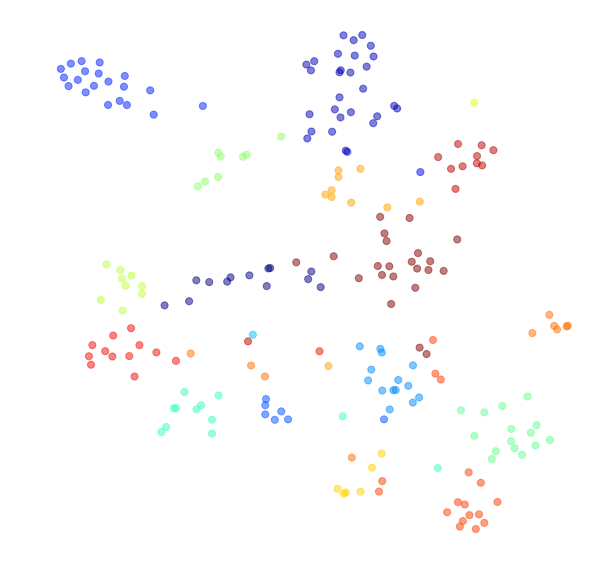

In [140]:
f = plt.figure(figsize=(10, 10))
ax = f.add_subplot(111)
ax.scatter(
    poinf_tsne[:, 0],
    poinf_tsne[:, 1],
    c=list(lookup_poinf_more_drop.best_topic),
    cmap=plt.cm.jet,
    s=50,
    alpha=.5)
ax.legend(loc='best')
ax.axis('off')
plt.show()

In [142]:
poinf_tsne.shape

(219, 2)

#### `MDS`

In [115]:
# Multidimensional Scaling
mds_poinf = manifold.MDS(n_components=2, random_state=rng).fit_transform(data_poinf)

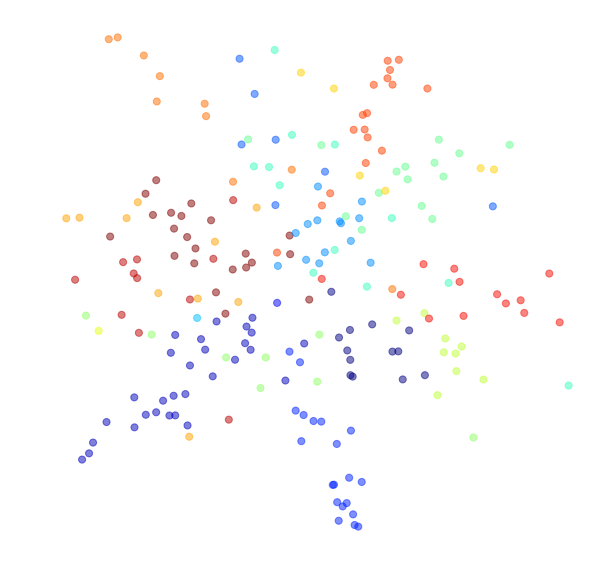

In [119]:
f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111)
ax.scatter(mds_poinf[:,0], mds_poinf[:,1], c=list(lookup_poinf_more_drop.best_topic), cmap=plt.cm.jet, s=50, alpha=.5)
ax.legend(loc='best')
ax.axis('off')
plt.show()

### K means

In [143]:
kmeansClustering = KMeans(n_clusters=20).fit_predict(data_poinf)

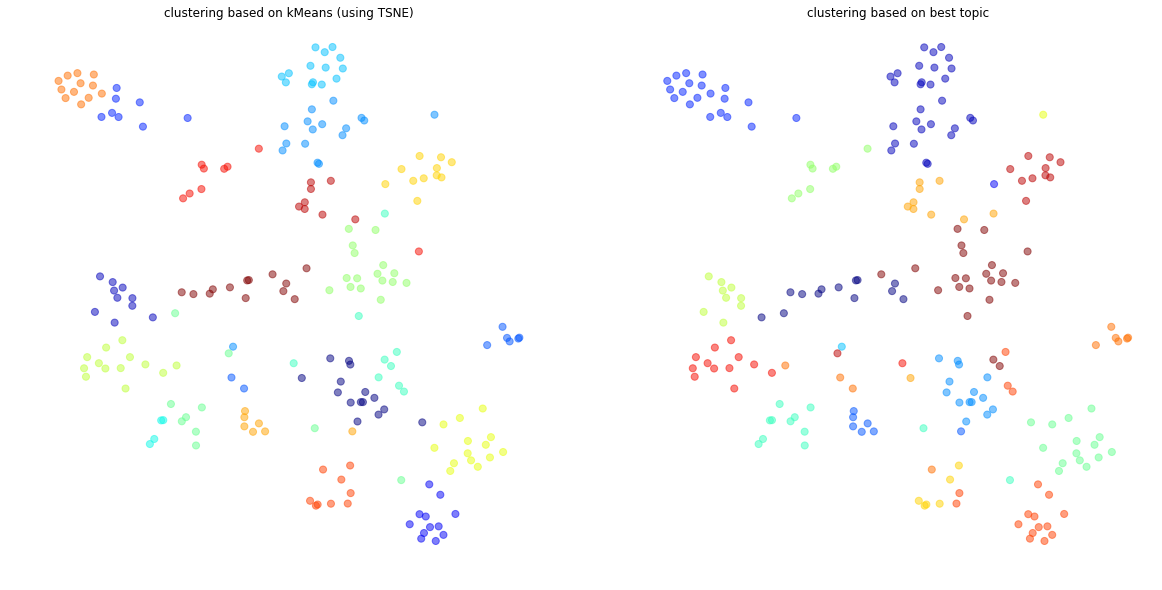

In [144]:
f = plt.figure(figsize=(20, 10))
ax = f.add_subplot(121)
ax.scatter(
    poinf_tsne[:, 0],
    poinf_tsne[:, 1],
    c=kmeansClustering,
    cmap=plt.cm.jet,
    s=50,
    alpha=.5)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('clustering based on kMeans (using TSNE)')
ax2 = f.add_subplot(122)
ax2.scatter(
    poinf_tsne[:, 0],
    poinf_tsne[:, 1],
    c=list(lookup_poinf_more_drop.best_topic),
    cmap=plt.cm.jet,
    s=50,
    alpha=.5)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('clustering based on best topic')
plt.show()

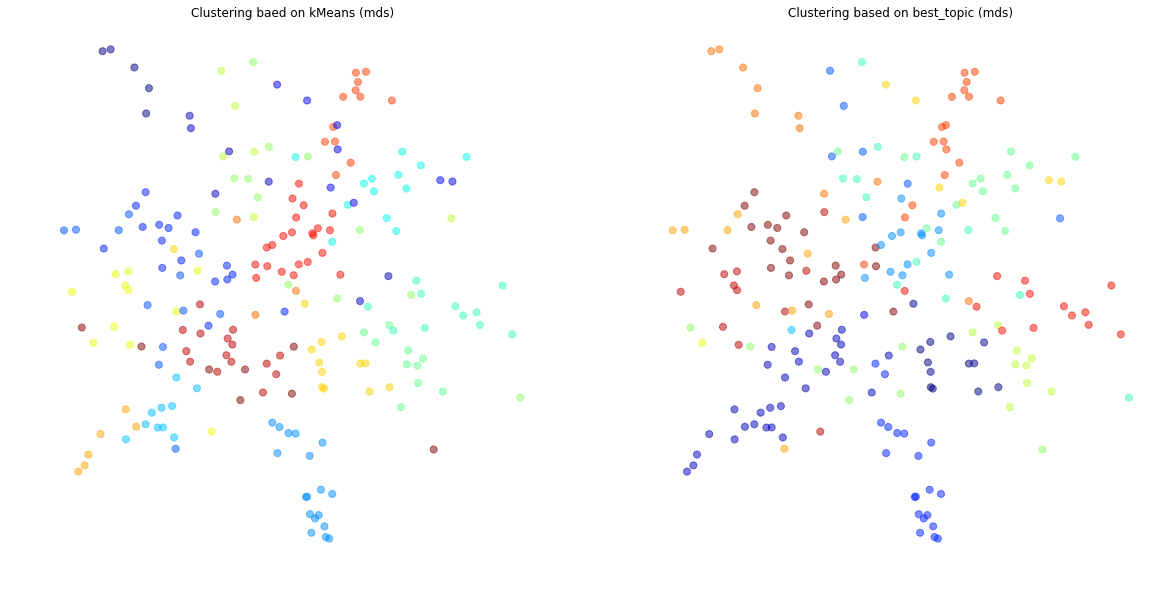

In [123]:
f = plt.figure(figsize=(20, 10))
ax = f.add_subplot(121)
ax.scatter(
    mds_poinf[:, 0],
    mds_poinf[:, 1],
    c=kmeansClustering,
    cmap=plt.cm.jet,
    s=50,
    alpha=.5)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('Clustering baed on kMeans (mds)')

ax2 = f.add_subplot(122)
ax2.scatter(
    mds_poinf[:, 0],
    mds_poinf[:, 1],
    c=list(lookup_poinf_more_drop.best_topic),
    cmap=plt.cm.jet,
    s=50,
    alpha=.5)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('Clustering based on best_topic (mds)')
plt.show()
plt.show()

### DBScan

In [190]:
dbscan = DBSCAN(min_samples=1, algorithm='ball_tree', leaf_size=2).fit(data_poinf)

In [191]:
dbscan_clusters = dbscan.labels_
n_clusters_ = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
print 'number of clusters:', n_clusters_

In [193]:
dbscan_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [197]:
# Try with the tsne data:
dbscan_tsne = DBSCAN().fit(x)

In [198]:
dbscan_tsne_clusters = dbscan_tsne.labels_

In [199]:
n_clusters_tsne = len(set(dbscan_tsne_clusters)) - (1 if -1 in dbscan_tsne_clusters else 0)
print 'number of clusters:', n_clusters_

number of clusters: 1



### HDBSCAN

In [124]:
hdbscan_cluster_poinf = HDBSCAN().fit(data_poinf)

number of clusters: 2


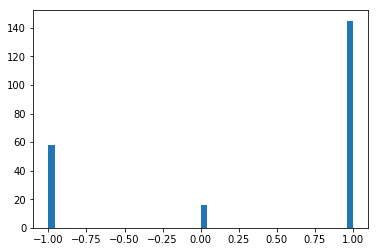

In [125]:
n_clusters_ = len(set(hdbscan_cluster_poinf.labels_)) - (1 if -1 in hdbscan_cluster_poinf.labels_ else 0)
print 'number of clusters:', n_clusters_


f = plt.figure()
ax = f.add_subplot(111)
ax.hist(hdbscan_cluster_poinf.labels_,bins=50);
plt.show()

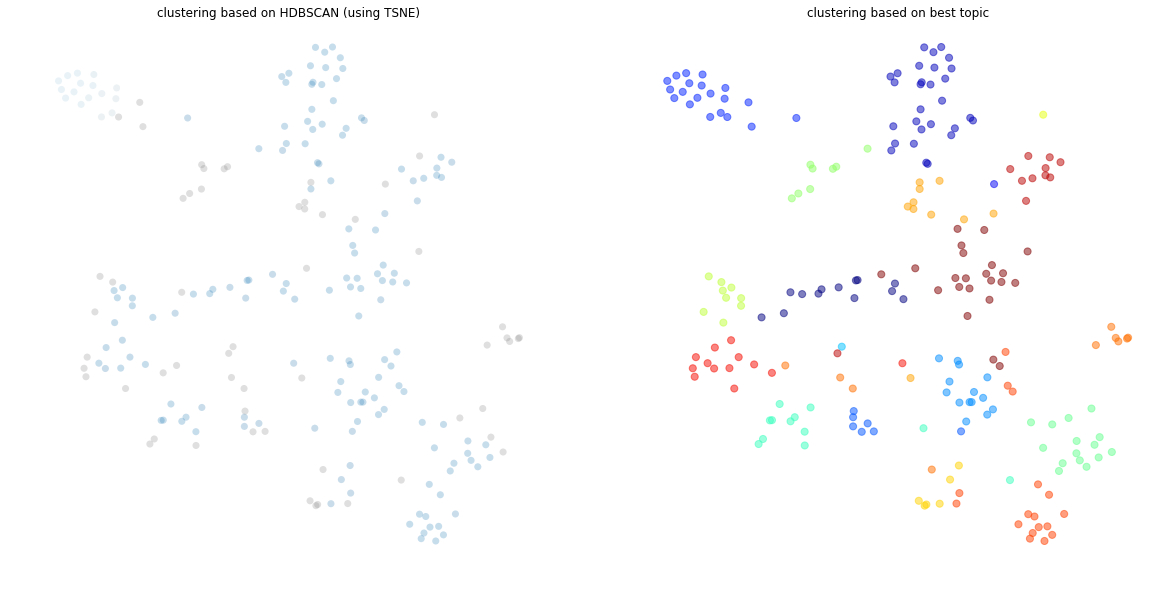

In [145]:
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(121)
color_palette = sns.color_palette('husl', 103)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in hdbscan_cluster_poinf.labels_]
#  colors weighted according to te probability of being in the cluster
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, hdbscan_cluster_poinf.probabilities_)] 
ax.scatter(*poinf_tsne.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

# ax.scatter(x_components[:,0], x_components[:,1], c=hdbscan_cluster.labels_, cmap=plt.cm.jet, s=8)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('clustering based on HDBSCAN (using TSNE)')

ax2 = f.add_subplot(122)
ax2.scatter(poinf_tsne[:,0], poinf_tsne[:,1], c=list(lookup_poinf_more_drop.best_topic), cmap=plt.cm.jet, s=50, alpha=.5)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('clustering based on best topic')

plt.show()

###  Soft Clustering of poInf

In [173]:
cluster_poinf = HDBSCAN(prediction_data=True).fit(data_poinf)

number of clusters: 2


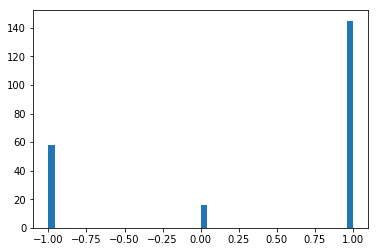

In [174]:
n_clusters_ = len(set(cluster_poinf.labels_)) - (1 if -1 in cluster_poinf.labels_ else 0)
print 'number of clusters:', n_clusters_

f = plt.figure()
ax = f.add_subplot(111)
ax.hist(cluster_poinf.labels_,bins=50);
plt.show()

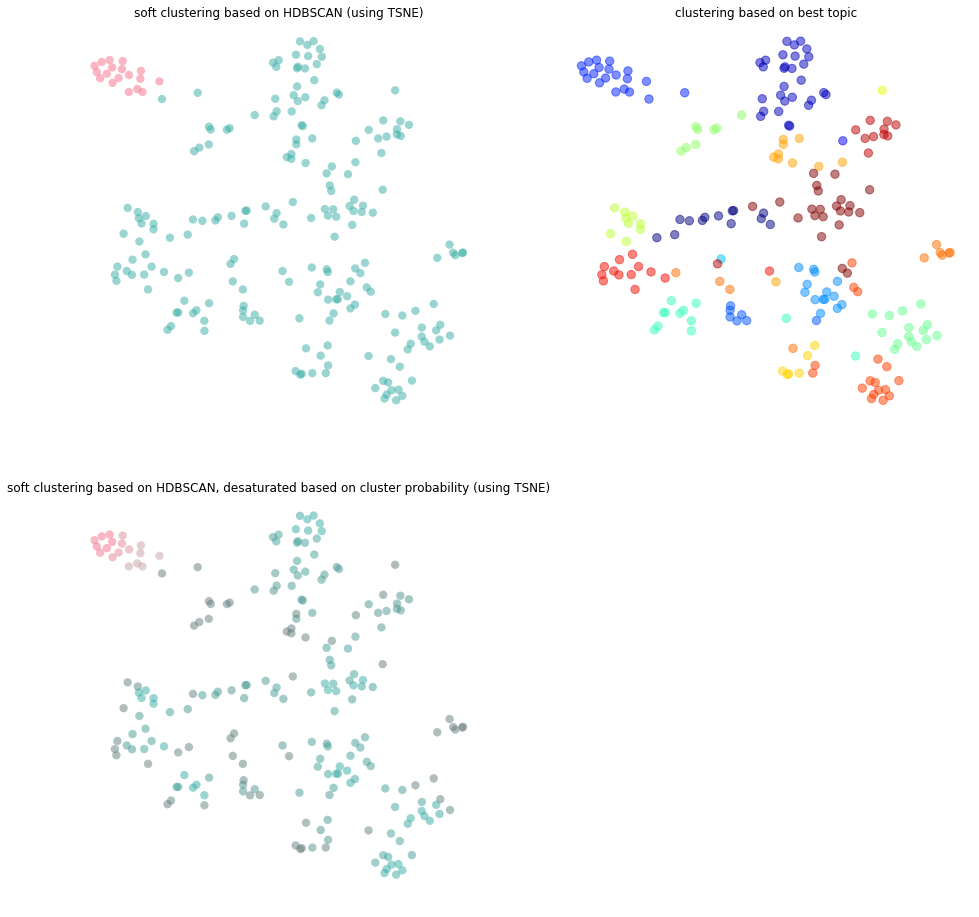

In [175]:
f = plt.figure(figsize=(16, 16))
ax = f.add_subplot(221)

soft_clusters = hdbscan.all_points_membership_vectors(cluster_poinf)
color_palette = sns.color_palette('husl', 2)
cluster_colors = [color_palette[np.argmax(x)] for x in soft_clusters]
ax.scatter(*poinf_tsne.T, s=70, linewidth=0, c=cluster_colors, alpha=0.5)
# ax.scatter(x_components[:,0], x_components[:,1], c=hdbscan_cluster.labels_, cmap=plt.cm.jet, s=8)
ax.legend(loc='best')
ax.axis('off')
ax.set_title('soft clustering based on HDBSCAN (using TSNE)')

ax2 = f.add_subplot(222)
ax2.scatter(
    poinf_tsne[:, 0],
    poinf_tsne[:, 1],
    c=list(lookup_poinf_more_drop.best_topic),
    cmap=plt.cm.jet,
    s=70,
    alpha=.5)
ax2.legend(loc='best')
ax2.axis('off')
ax2.set_title('clustering based on best topic')

ax3 = f.add_subplot(223)
cluster_colors = [
    sns.desaturate(color_palette[np.argmax(x)], np.max(x))
    for x in soft_clusters
]
ax3.scatter(*poinf_tsne.T, s=70, linewidth=0, c=cluster_colors, alpha=0.5)
ax3.axis('off')
ax3.set_title(
    'soft clustering based on HDBSCAN, desaturated based on cluster probability (using TSNE)'
)
plt.show()

In [176]:
soft_clusters.shape

(219, 2)

In [182]:
classDef = np.argmax(soft_clusters,axis=1)

In [190]:
lookup_poinf_more_drop.iloc[classDef==1]

last_name       first_name  \
id                                                                    
010f9bf0-c04c-4cfb-ab3d-ca150de1e706       jackson             paul   
0346dc9e-e2a7-4523-8504-a74ef42a533b     pullinger           martin   
03916cbc-3a54-4de4-be54-09c23f44dbb5     kalorkoti                k   
0505dfc1-9fe5-4f4a-bab3-4af14ee69db3      goryanin             igor   
053590d0-39d7-4a42-b42d-61ee8d743d3e       goddard            nigel   
05ed47ac-4c5e-4f9a-b7b2-45828eaad326       wallden           petros   
06760916-edca-488e-93da-baff6204a453        marina           mahesh   
087adc6d-e04b-4168-8824-2fa69f6b39e7        vaniea             kami   
09607fb1-44fb-4edc-a0ae-c54d3047be30         court           robert   
09931c59-595a-487a-a38f-2b28fdc4e406          mayr          richard   
0cf9e165-3552-465d-8ce0-a3c8e56a0f77  grundkiewicz            roman   
0d60e141-a185-4709-a2c0-b18af3a1b3e4        morgan             evan   
0d66e947-585b-4eb0-975d-e8c2e2dc96b1     hartswood             mark   
0e635bd1-f0fb-4f16-a68a-d0457b80eed7      williams      christopher   
102286ee-5f21-4aed-abfd-e4ea1a615223    oberlander              jon   
10ff8e7a-53b2-4d2f-adad-ef695bc595a7           wen           zhenyu   
114a78ef-c940-4653-8429-7c2897a96043     jovanovic           jelena   
1458e0ed-f765-4bf7-a151-b3201e5a8ae8         klein             ewan   
15b544ff-f14e-4393-bee6-0aa38f4361b6      steedman             mark   
1997d4be-de27-44bd-ad89-36e6f386225d     alexandru         cristina   
1a05e95b-6e1a-40d8-8406-d5e62b7c722d         banks            chris   
1a776ed4-3d64-416c-b80b-f84dbe849899     karaiskos         vasilios   
1b064412-0109-4090-a60f-bafcbbad74be       kilgour         jonathan   
1bbcff05-f819-4c25-a2a0-a03d793b788c     shillcock          richard   
1c6a1e04-4291-426e-a921-42be34ba8494        cheney            james   
1d499fa8-54c4-4217-904e-9b5e2bcefc61          chen              wei   
204097e4-072c-4df3-bb1d-f45380908692        haddow            barry   
213fbdf4-a67d-4b06-8614-3b864f740266     bradfield           julian   
23541f3f-42a3-4637-a43f-603d8bf9372b      petillot             yvan   
2374a5c7-54ec-4513-9c13-a3787724420b      sorokina           oksana   
...                                            ...              ...   
d9cfbd11-051e-4b9e-8120-b97486cc4263         eshky            aciel   
da3124d7-44f9-4199-82bf-9e964f422ab9     armstrong          douglas   
dbb07214-3753-4bba-a630-e1857e7efb09        arvind              d k   
dde24035-cf29-4dab-aeff-3696dd140d70       sindaci  martino sorbaro   
dde6eac2-ecfc-40da-84e3-f0355547c99b        selega            alina   
dfd98db5-9b1d-43d3-ad29-8a584195cdb8       storkey             amos   
dfee7091-0d56-4b1e-a821-5f0f0b37ea02       simpson              ian   
e111bbd0-4d9c-45a9-8a1c-6ed33c871568         stark              ian   
e346d85f-17fb-4bfb-b94a-7e1891987ac2        keller            frank   
e4fface3-9781-4bfa-9a40-9340f707cde3      arapinis            myrto   
e554cc1b-7106-4355-afce-280d0a04e34a      etessami           kousha   
e76a7c40-a177-4eb5-9ac3-12ab104895f8        perera           roland   
ea253c8d-bdc3-47fa-9091-8e0c9512f345    schweikert         gabriele   
ec061db1-98b7-4ad8-9ba3-257f390dbe34      heafield          kenneth   
ecd799fb-4f63-44ae-a078-b009099f2c8c          alex         beatrice   
ee01bccc-c4d2-45f8-a81c-9c634464a623        lapata          mirella   
ef0fbd5f-acbb-433e-9cd7-4cfd8d3fc513    shimodaira          hiroshi   
efbfd31a-4fd3-450c-9761-7871d7026cf5          radu         valentin   
f0a3769d-bc61-42f4-b06a-8b90b20a44dc      calautti            marco   
f0e55345-3da8-451d-bd30-8b1068015efc         koehn          philipp   
f2d0a050-bb05-469c-a97c-007e1f744ba4      manataki            areti   
f598be85-b9b9-42b2-b09c-c70eafa6ee8d          heil        katharina   
f66a2291-496c-4371-a060-ef2d68c379f3     ricciotti           wilmer   
f804a9ce-5cc1-456b-b652-a91c8e034c68         birch        alexand

In [191]:
lookup_poinf_more_drop.iloc[classDef==0]

last_name  first_name  \
id                                                                 
02c86de2-0fc9-4f6d-aee9-93b0f7557c84          franke      bjoern   
0b2fae7b-cf7f-4f8b-a92c-4fa055ff9d63        bhatotia      pramod   
0d940898-e2a7-4262-bf06-5b146fb79ba2           spink         tom   
0ed800f5-a3a0-47d7-a8b3-f97a4f2b6931         steuwer      michel   
12b8d4c5-226d-430f-8c55-554aa75fcda8           joshi       arpit   
2026e8cc-5cb9-4397-b9a9-490ed120e2a5            grot       boris   
3d2352c5-8e16-4434-8802-67d74d0a4b36          viglas     stratis   
412b9b6c-a9d5-47d6-81af-018323057f36           bodin       bruno   
489d4278-a0a6-4e8b-857a-4ee0e800766f        wagstaff       harry   
68ca9564-52a9-46ce-92af-0480a43b555d            cole      murray   
6dc0617d-43af-4c3a-88a6-aadf5bd8f57b           smith       aaron   
754637e1-0756-4d21-9afe-732b294e303f          dubach  christophe   
c18e1d0a-166d-4615-b7f8-4eb02e964656         leather        hugh   
d15a43ba-c1c3-46bd-af99-55483ee5d119      petoumenos      pavlos   
d8071e52-0b22-4b1a-b4aa-3b04ba9c75b7          topham       nigel   
e184b211-081f-450b-8931-b0471a0e0c29  sreekar shenoy      govind   
eb085c28-d4a0-4d51-83e8-881a148e7fff           kumar      rakesh   
f53b1ad8-3f19-4e7e-8a3a-f7996de038c0       nagarajan       vijay   

                                                                          perseonal_url  \
id                                                                                        
02c86de2-0fc9-4f6d-aee9-93b0f7557c84  http://www.research.ed.ac.uk/portal/en/persons...   
0b2fae7b-cf7f-4f8b-a92c-4fa055ff9d63  http://www.research.ed.ac.uk/portal/en/persons...   
0d940898-e2a7-4262-bf06-5b146fb79ba2  http://www.research.ed.ac.uk/portal/en/persons...   
0ed800f5-a3a0-47d7-a8b3-f97a4f2b6931  http://www.research.ed.ac.uk/portal/en/persons...   
12b8d4c5-226d-430f-8c55-554aa75fcda8  http://www.research.ed.ac.uk/portal/en/persons...   
2026e8cc-5cb9-4397-b9a9-490ed120e2a5  http://www.research.ed.ac.uk/portal/en/persons...   
3d2352c5-8e16-4434-8802-67d74d0a4b36  http://www.research.ed.ac.uk/portal/en/persons...   
412b9b6c-a9d5-47d6-81af-018323057f36  http://www.research.ed.ac.uk/portal/en/persons...   
489d4278-a0a6-4e8b-857a-4ee0e800766f  http://www.research.ed.ac.uk/portal/en/persons...   
68ca9564-52a9-46ce-92af-0480a43b555d  http://www.research.ed.ac.uk/portal/en/persons...   
6dc0617d-43af-4c3a-88a6-aadf5bd8f57b  http://www.research.ed.ac.uk/portal/en/persons...   
754637e1-0756-4d21-9afe-732b294e303f  http://www.research.ed.ac.uk/portal/en/persons...   
c18e1d0a-166d-4615-b7f8-4eb02e964656  http://www.research.ed.ac.uk/portal/en/persons...   
d15a43ba-c1c3-46bd-af99-55483ee5d119  http://www.research.ed.ac.uk/portal/en/persons...   
d8071e52-0b22-4b1a-b4aa-3b04ba9c75b7  http://www.research.ed.ac.uk/portal/en/persons...   
e184b211-081f-450b-8931-b0471a0e0c29  http://www.research.ed.ac.uk/portal/en/persons...   
eb085c28-d4a0-4d51-83e8-881a148e7fff  http://www.research.ed.ac.uk/portal/en/persons...   
f53b1ad8-3f19-4e7e-8a3a-f7996de038c0  http://www.research.ed.ac.uk/portal/en/persons...   

                                                                               position  \
id                                                                                        
02c86de2-0fc9-4f6d-aee9-93b0f7557c84                                             reader   
0b2fae7b-cf7f-4f8b-a92c-4fa055ff9d63  senior lecturer in computing systems architecture   
0d940898-e2a7-4262-bf06-5b146fb79ba2                                 research associate   
0ed800f5-a3a0-47d7-a8b3-f97a4f2b6931                                            unknown   
12b8d4c5-226d-430f-8c55-554aa75fcda8                                 research associate   
2026e8cc-5cb9-4397-b9a9-490ed120e2a5                            lecturer in informatics   
3d2352c5-8e16-4434-8802-67d74d0a4b36  personal chair of data management on new hardware   
412b9b6c-a9d5-47d6-81af-018323057f36      

# Model 2: 2012-2017 (6yr infnet)

In [17]:
pub_toks_6yr = pkl.load(open('./pub_toks_wBOW_combinedyrs.pkl','rb'))
dictionary_6yr = pkl.load(open('./dictionary_6yr.pkl', 'rb'))
# load the LDA model:
lda_6yr = models.LdaModel.load('lda_6yr.ldamodel')

In [18]:
# Add in the infered topics
_inference = lambda row: inference(lda_6yr, row.bow)
pub_toks_6yr['topic_distribution'] = pub_toks_6yr.apply(_inference, axis=1)

In [19]:
# best topic for coloring
pub_toks_6yr['best_topic'] = pub_toks_6yr.apply(
    lambda row: best_topic(row.topic_distribution), axis=1)

In [20]:
len(pub_toks_6yr)

3574

In [22]:
## Our dataset will be the topic_distribution:
data_6yr = pub_toks_6yr.topic_distribution.values

In [24]:
# TSNE
tsne_6yr_components = manifold.TSNE(n_components=2, init='pca', random_state=rng).fit_transform(data_6yr)
# Multidimensional Scaling
mds_6yr_component = manifold.MDS(n_components=2, random_state=rng).fit_transform(data_6yr)

ValueError: setting an array element with a sequence.